In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

-------------------M6---------------------

In [69]:
ds6=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m6_obs_new-Copy1.csv',skiprows=[1])
wam5=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m6.csv')

In [70]:
wam5

,time,H_s
0,2023-09-21 00:00:00,1.925246
1,2023-09-21 01:00:00,1.915366
2,2023-09-21 02:00:00,1.861080
3,2023-09-21 03:00:00,1.817287
4,2023-09-21 04:00:00,1.791139
...,...,...
308,2023-10-03 20:00:00,3.339876
309,2023-10-03 21:00:00,3.324586
310,2023-10-03 22:00:00,3.316277
311,2023-10-03 23:00:00,3.296805


In [71]:
time_obs=ds6.Date.values
hmax1=ds6['Sig Wave Height'].values
hmax_MI=hmax1

In [72]:
t_a6=wam5.time.values
hs_a6=wam5.H_s.values

In [73]:
t_obs6=pd.to_datetime(time_obs)
t6=pd.to_datetime(t_a6)

/tmp/ipykernel_443753/46855813.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t_obs6=pd.to_datetime(time_obs)


(array([19624., 19625., 19626., 19627., 19628., 19629., 19630., 19631.,
        19632., 19633., 19634.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

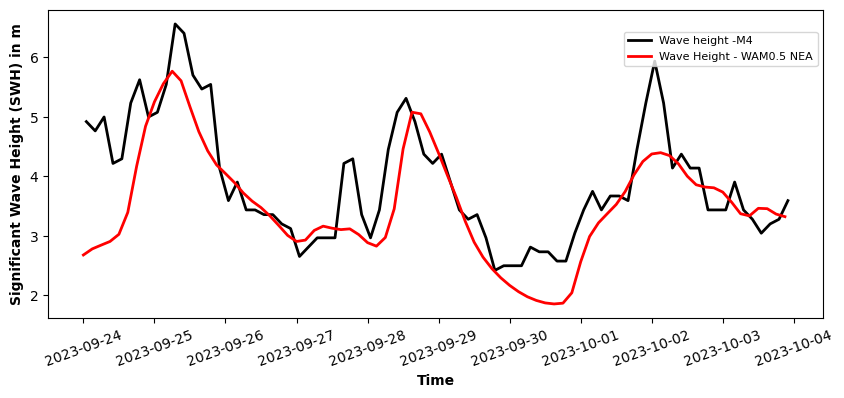

In [74]:
fig = plt.figure(figsize=(10,4))
plt.plot(t_obs6[72:311:3],hmax_MI[72:311:3],color='black',linewidth=2.0,label='Wave height -M4')
plt.plot(t6[72:311:3],hs_a6[72:311:3],color='red',linewidth=2.0,label='Wave Height - WAM0.5 NEA')

plt.xlabel('Time',fontsize='larger',fontweight='bold')
plt.ylabel('Significant Wave Height (m)',fontsize='larger',fontweight='bold')
plt.xlabel('Time',fontsize='medium')
plt.ylabel('Significant Wave Height (SWH) in m',fontsize='medium')
legend=plt.legend(loc='lower right', bbox_to_anchor=(1,0.8),prop={'size': 8})

plt.xticks(rotation=20)

In [75]:
obs_m=np.mean(hmax_MI[72:311:3])
wm=np.mean(hs_a6[72:311:3])
bias_w=np.mean(hs_a6[72:311:3]-hmax_MI[72:311:3])
rmse_w=np.sqrt(np.mean((hs_a6[72:311:3] - hmax_MI[72:311:3]) ** 2))
si_w=rmse_w/obs_m

In [76]:
obs_m,wm,bias_w,rmse_w,si_w

(3.9122,
 3.51470078375,
 -0.39749921625000006,
 0.768927138974575,
 0.1965459687578792)

-------------------M4---------------------

In [2]:
ds4=pd.read_csv('/work/uo1075/b381754/Validation/MI_WAVE_BOUY/deepwater_bouy/m4_obs.csv',skiprows=[1])
am4=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m4.csv')

In [3]:
# Load the CSV data
ds4_mod = ds4

# Convert the 'Date' column to datetime
ds4_mod['Date'] = pd.to_datetime(ds4_mod['Date'], format='%d/%m/%Y %H:%M:%S')

# Set the 'Date' column as the index
ds4_mod.set_index('Date', inplace=True)

# Generate a complete hourly time index from the minimum to the maximum date in the data
complete_index = pd.date_range(start=ds4_mod.index.min(), end=ds4_mod.index.max(), freq='H')

# Reindex the dataframe to the complete hourly index, introducing NaNs for missing timestamps
ds4_mod = ds4_mod.reindex(complete_index)

# Interpolate missing values in the 'Sig Wave Height' column (linear interpolation)
ds4_mod['Sig Wave Height'] = ds4_mod['Sig Wave Height'].interpolate(method='linear')

In [4]:
# Reset the index to convert the time index back to a column
ds4_mod.reset_index(inplace=True)

# Rename the new index column to 'Date'
ds4_mod.rename(columns={'index': 'Date'}, inplace=True)

# Now, ds will have the 'Date' column included along with other data
print(ds4_mod.head())

                 Date  Wave Perid  Sig Wave Height  Max Wave Period   
0 2023-09-21 01:00:00       7.266            3.281           11.719  \
1 2023-09-21 02:00:00       6.914            3.398           11.719   
2 2023-09-21 03:00:00       6.797            2.930           10.313   
3 2023-09-21 04:00:00       6.914            3.164            9.609   
4 2023-09-21 05:00:00       6.914            3.281            9.609   

   Max Wave Height  Mean Wave Dir  
0            5.469          264.0  
1            5.156          259.0  
2            5.469          263.0  
3            5.625          248.0  
4            4.531          253.0  


In [5]:
time_obs4=ds4_mod.Date.values
hmax1=ds4_mod['Sig Wave Height'].values
hmax_MI4=hmax1

t_a4=am4.time.values
hs_a4=am4.Hs.values

In [6]:
t_obs4=pd.to_datetime(time_obs4)
t4=pd.to_datetime(t_a4)

(array([19624., 19625., 19626., 19627., 19628., 19629., 19630., 19631.,
        19632., 19633., 19634.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

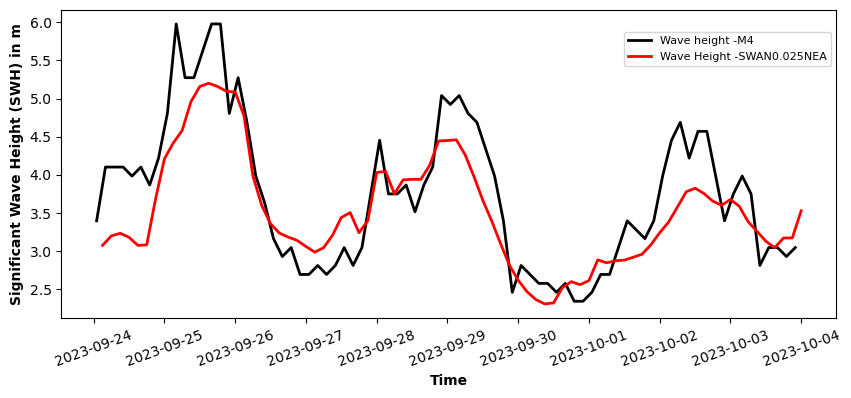

In [8]:
fig = plt.figure(figsize=(10,4))
plt.plot(t_obs4[72:311:3],hmax_MI4[72:311:3],color='black',linewidth=2.0,label='Wave height -M4')
plt.plot(t4[25:105],hs_a4[25:105],color='red',linewidth=2.0,label='Wave Height -SWAN0.025NEA')

plt.xlabel('Time',fontsize='larger',fontweight='bold')
plt.ylabel('Significant Wave Height (m)',fontsize='larger',fontweight='bold')
plt.xlabel('Time',fontsize='medium')
plt.ylabel('Significant Wave Height (SWH) in m',fontsize='medium')
legend=plt.legend(loc='lower right', bbox_to_anchor=(1,0.8),prop={'size': 8})

plt.xticks(rotation=20)

In [12]:
o4m=np.mean(hmax_MI4[72:311:3])
s4m=np.mean(hs_a4[25:105])
bias_4=np.mean(hs_a4[25:105]-hmax_MI4[72:311:3])
rmse_4 = np.sqrt(np.mean(((hs_a4[25:105]) - hmax_MI4[72:311:3]) ** 2))
si_4=rmse_4/o4m

In [13]:
correlation4 = np.corrcoef(hmax_MI4[72:311:3],hs_a4[25:105])[0, 1]
print("Pearson correlation coefficient:", correlation4)

Pearson correlation coefficient: 0.8672227233666148


In [16]:
print("bias_m4",bias_4)
print("RMSE_4:",rmse_4)

bias_m4 -0.22347917374999993
RMSE_4: 0.5288281615141315


In [37]:
ds3=pd.read_csv('/work/uo1075/b381754/Validation/MI_WAVE_BOUY/deepwater_bouy/m3_obs.csv',skiprows=[1])
am3=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m3.csv')

In [38]:
ds3_mod = ds3

# Convert the 'Date' column to datetime
ds3_mod['Date'] = pd.to_datetime(ds3_mod['Date'], format='%d/%m/%Y %H:%M:%S')

# Set the 'Date' column as the index
ds3_mod.set_index('Date', inplace=True)

# Generate a complete hourly time index from the minimum to the maximum date in the data
complete_index = pd.date_range(start=ds3_mod.index.min(), end=ds3_mod.index.max(), freq='H')

# Reindex the dataframe to the complete hourly index, introducing NaNs for missing timestamps
ds3_mod = ds3_mod.reindex(complete_index)

# Interpolate missing values in the 'Sig Wave Height' column (linear interpolation)
ds3_mod['Sig Wave Height'] = ds3_mod['Sig Wave Height'].interpolate(method='linear')

In [39]:
# Reset the index to convert the time index back to a column
ds3_mod.reset_index(inplace=True)

# Rename the new index column to 'Date'
ds3_mod.rename(columns={'index': 'Date'}, inplace=True)

# Now, ds will have the 'Date' column included along with other data
print(ds3_mod.head())

                 Date  Wave Perid  Sig Wave Height  Max Wave Period   
0 2023-09-21 01:00:00       7.148            3.281            9.375  \
1 2023-09-21 02:00:00       6.680            3.164           10.195   
2 2023-09-21 03:00:00       7.500            3.516            9.375   
3 2023-09-21 04:00:00       7.383            3.633           10.195   
4 2023-09-21 05:00:00       7.266            3.281            9.492   

   Max Wave Height  Mean Wave Dir  
0            5.781          276.0  
1            5.469          273.0  
2            5.781          277.0  
3            5.469          274.0  
4            5.625          269.0  


In [40]:
time_obs3=ds3_mod.Date.values
hmax13=ds3_mod['Sig Wave Height'].values
hmax_MI3=hmax13

t_a3=am3.time.values
hs_a3=am3.Hs.values

In [41]:
t_obs3=pd.to_datetime(time_obs3)
t3=pd.to_datetime(t_a3)

Text(0, 0.5, 'Significant Wave Height (m)')

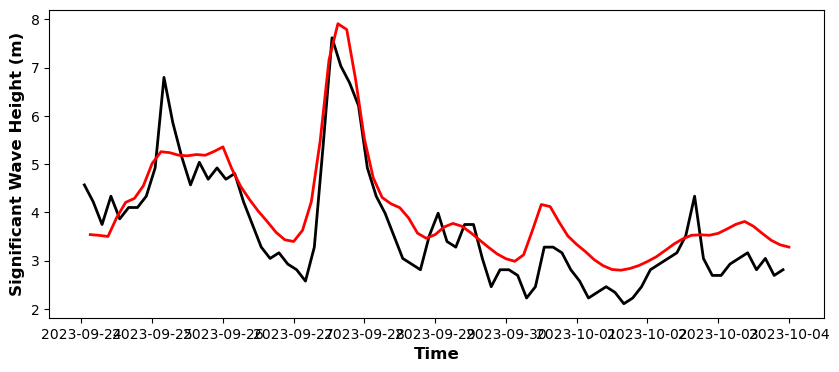

In [42]:
fig = plt.figure(figsize=(10, 4))
plt.plot(t_obs3[72:311:3],hmax_MI3[72:311:3],color='black',linewidth=2.0,label='Wave height -M4')
plt.plot(t3[25:105],hs_a3[25:105],color='red',linewidth=2.0,label='Wave Height -SWAN0.025NEA')

plt.xlabel('Time',fontsize='large',fontweight='bold')
plt.ylabel('Significant Wave Height (m)',fontsize='large',fontweight='bold')

In [46]:
o3m=np.mean(hmax_MI3[72:311:3])
s3m=np.mean(hs_a3[25:105])
bias_3=np.mean(hs_a3[25:105]-hmax_MI3[72:311:3])
rmse_3=np.sqrt(np.mean((hs_a3[25:105]+0.55-hmax_MI3[72:311:3]) ** 2))
si_3=rmse_3/o3m

In [56]:
o3m,s3m,bias_3,rmse_3,si_3

(3.6563374999999994,
 3.4270327700000003,
 -0.22930472999999987,
 0.6667505154134054,
 0.18235475128141357)

In [57]:
correlation3 = np.corrcoef(hmax_MI3[72:311:3],hs_a3[25:105])[0, 1]
print("Pearson correlation coefficient:", correlation3)

Pearson correlation coefficient: 0.8715772730376219


In [47]:
ds2=pd.read_csv('/work/uo1075/b381754/Validation/MI_WAVE_BOUY/deepwater_bouy/m2_obs.csv',skiprows=[1])
m2=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m2.csv')# SWAN result

In [48]:
# Load the CSV data
ds2_mod = ds2

# Convert the 'Date' column to datetime
ds2_mod['Date'] = pd.to_datetime(ds2_mod['Date'], format='%d/%m/%Y %H:%M:%S')

# Set the 'Date' column as the index
ds2_mod.set_index('Date', inplace=True)

# Generate a complete hourly time index from the minimum to the maximum date in the data
complete_index = pd.date_range(start=ds2_mod.index.min(), end=ds2_mod.index.max(), freq='H')

# Reindex the dataframe to the complete hourly index, introducing NaNs for missing timestamps
ds2_mod = ds2_mod.reindex(complete_index)

# Interpolate missing values in the 'Sig Wave Height' column (linear interpolation)
ds2_mod['Sig Wave Height'] = ds2_mod['Sig Wave Height'].interpolate(method='linear')

In [49]:
# Reset the index to convert the time index back to a column
ds2_mod.reset_index(inplace=True)

# Rename the new index column to 'Date'
ds2_mod.rename(columns={'index': 'Date'}, inplace=True)

# Now, ds will have the 'Date' column included along with other data
print(ds2_mod.head())

                 Date  Wave Perid  Sig Wave Height  Max Wave Period   
0 2023-09-21 01:00:00       4.570            1.523            6.445  \
1 2023-09-21 02:00:00       4.688            1.406            6.914   
2 2023-09-21 03:00:00       4.688            1.523            7.148   
3 2023-09-21 04:00:00       4.805            1.289            7.852   
4 2023-09-21 05:00:00       4.922            1.055           12.422   

   Max Wave Height  Mean Wave Dir  
0            2.656          198.0  
1            2.344          193.0  
2            2.500          191.0  
3            2.031          194.0  
4            1.875          201.0  


In [50]:
time_obs2=ds2_mod.Date.values
hmax12=ds2_mod['Sig Wave Height'].values
hmax_MI2=hmax12

t_a2=m2.time.values
hs_a2=m2.Hs.values

In [51]:
t_obs2=pd.to_datetime(time_obs2)
t2=pd.to_datetime(t_a2)

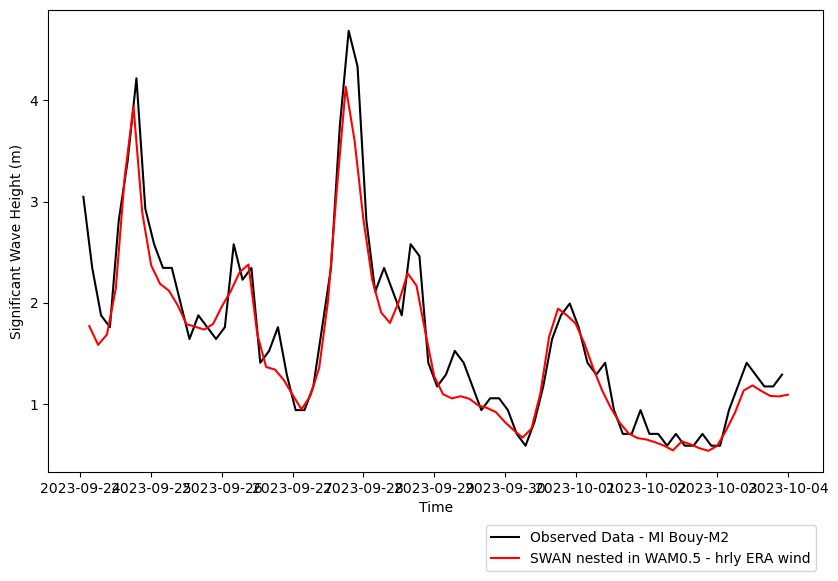

In [52]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t_obs2[72:311:3],hmax_MI2[72:311:3],color='black',label='Observed Data - MI Bouy-M2')
plt.plot(t2[25:105],hs_a2[25:105],color='red',label='SWAN nested in WAM0.5 - hrly ERA wind')
#plt.plot(tw,hsm,color='blue',linestyle='-.',label='WAM0.5')
plt.xlabel('Time')
plt.ylabel('Significant Wave Height (m)')
legend=plt.legend(bbox_to_anchor=(1, -0.1))

In [53]:
o2m=np.mean(hmax_MI2[72:311:3])
s2m=np.mean(hs_a2[25:105])
bias_2=np.mean(hs_a2[25:105]-hmax_MI2[72:311:3])
rmse_2=np.sqrt(np.mean((hs_a2[25:105]-hmax_MI2[72:311:3]) ** 2))
si_2=rmse_2/o2m

In [54]:
o2m,s2m,bias_2,rmse_2,si_2

(1.6714624999999999,
 1.527758610875,
 -0.14370388912499993,
 0.4193399074434928,
 0.2508820314206827)

In [55]:
correlation2 = np.corrcoef(hmax_MI2[72:311:3],hs_a2[25:105])[0, 1]
print("Pearson correlation coefficient:", correlation2)

Pearson correlation coefficient: 0.899263183612459


---------------------M5--------------------

In [59]:
ds5=pd.read_csv('/work/uo1075/b381754/Validation/MI_WAVE_BOUY/deepwater_bouy/m5_obs.csv',skiprows=[1])
am5=pd.read_csv('/work/uo1075/b381754/Validation/validation_stat/m5.csv')

In [60]:
ds5_mod = ds5

# Convert the 'Date' column to datetime
ds5_mod['Date'] = pd.to_datetime(ds5_mod['Date'], format='%d/%m/%Y %H:%M:%S')

# Set the 'Date' column as the index
ds5_mod.set_index('Date', inplace=True)

# Generate a complete hourly time index from the minimum to the maximum date in the data
complete_index = pd.date_range(start=ds5_mod.index.min(), end=ds5_mod.index.max(), freq='H')

# Reindex the dataframe to the complete hourly index, introducing NaNs for missing timestamps
ds5_mod = ds5_mod.reindex(complete_index)

# Interpolate missing values in the 'Sig Wave Height' column (linear interpolation)
ds5_mod['Sig Wave Height'] = ds5_mod['Sig Wave Height'].interpolate(method='linear')

In [61]:
# Reset the index to convert the time index back to a column
ds5_mod.reset_index(inplace=True)

# Rename the new index column to 'Date'
ds5_mod.rename(columns={'index': 'Date'}, inplace=True)

# Now, ds will have the 'Date' column included along with other data
print(ds5_mod.head())

                 Date  Wave Perid  Sig Wave Height  Max Wave Period   
0 2023-09-21 01:00:00       6.563            2.578            9.609  \
1 2023-09-21 02:00:00       6.094            2.461           10.078   
2 2023-09-21 03:00:00       6.211            2.461            7.969   
3 2023-09-21 04:00:00       6.094            2.578            8.438   
4 2023-09-21 05:00:00       6.328            2.344            8.555   

   Max Wave Height  Mean Wave Dir  
0            3.750          235.0  
1            4.375          235.0  
2            3.438          239.0  
3            3.906          238.0  
4            3.594          238.0  


In [62]:
time_obs5=ds5_mod.Date.values
hmax15=ds5_mod['Sig Wave Height'].values
hmax_MI5=hmax15

t_a5=am5.time.values
hs_a5=am5.Hs.values

In [63]:
t_obs5=pd.to_datetime(time_obs5)
t5=pd.to_datetime(t_a5)

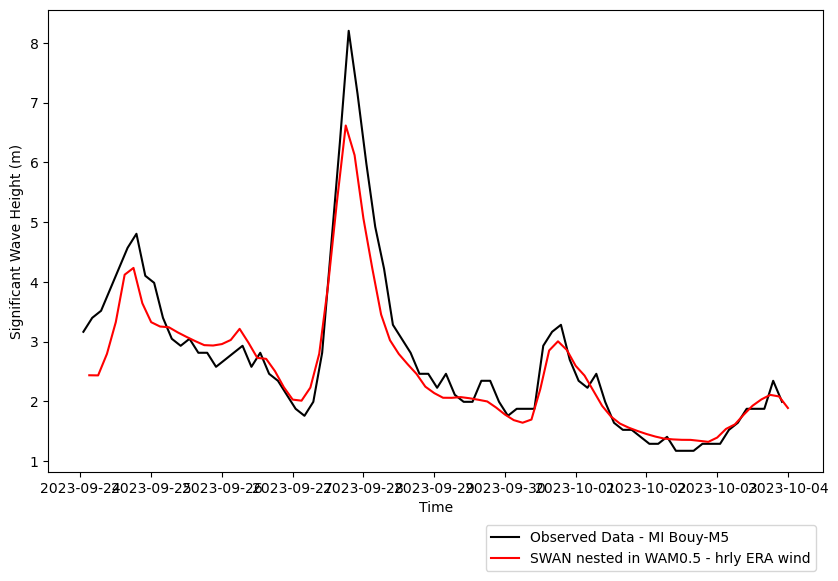

In [65]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t_obs5[72:311:3],hmax_MI5[72:311:3],color='black',label='Observed Data - MI Bouy-M5')

plt.plot(t5[25:105],hs_a5[25:105],color='red',label='SWAN nested in WAM0.5 - hrly ERA wind')

#plt.plot(tw,hsm,color='blue',linestyle='-.',label='WAM0.5')
plt.xlabel('Time')
plt.ylabel('Significant Wave Height (m)')
legend=plt.legend(bbox_to_anchor=(1, -0.1))

In [66]:
o5m=np.mean(hmax_MI5[72:311:3])
s5m=np.mean(hs_a5[25:105])
bias_5=np.mean(hs_a5[25:105]-hmax_MI5[72:311:3])
rmse_5=np.sqrt(np.mean((hs_a5[25:105]-hmax_MI5[72:311:3]) ** 2))
si_5=rmse_5/o5m

In [67]:
o5m,s5m,bias_5,rmse_5,si_5

(2.7173125,
 2.55209534625,
 -0.16521715374999993,
 0.5704593108337309,
 0.20993511450513364)

In [68]:
correlation5 = np.corrcoef(hmax_MI5[72:311:3],hs_a5[25:105])[0, 1]
print("Pearson correlation coefficient:", correlation5)

Pearson correlation coefficient: 0.9221430068287241
